<a href="https://colab.research.google.com/github/Jordan-mackey/INFO_5502_LABS/blob/main/lab_assignment_08_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Eighth Lab-assignment (08/09/2022 11:59'AM' - 08/12/2022 11:59PM, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing and annotation quality evaluation.

### Question 1 (10 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

In [ ]:
# You answer here
'Ho - the proportion of children with autism is 5%.'
'Ha - the proportion of children with autism is more than 5%.'
'a = 0.05'
'The appropriate test for this data given is the 1-sample z test.'
'necessary conditions: randomness, normality, and independence'

In [ ]:
# your code here
from statsmodels.stats.proportion import proportions_ztest

# sample sizes
n = 384
n_aut = 46

# significance 5%
a = 0.05

# Ho
null = 0.05

# run test
stat, p_value = proportions_ztest(count=n_aut, nobs=n, value=null, alternative='larger')


# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > a:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


z_stat: 4.212, p_value: 0.000
Reject the null hypothesis - suggest the alternative hypothesis is true


### Question 2 (10 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.



(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [ ]:
# You answer here
'The datasets given are two separate groups of cereals - one group indicating "Children", and one group indicating "Adult". Each number is representative of the sugar content of the brand of cereal by % of weight'




/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


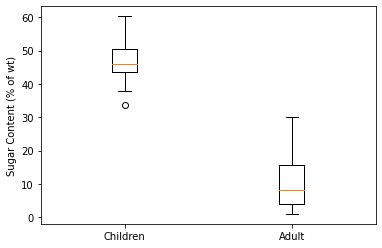


 Interpretation: The sugar content of adult cereals is significantly lower than the sugar content of child cereals.


In [ ]:
# (2) Create side-by-side boxplots and interpret what you see (5 points).
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create lists of values for each group
children = [40.3,55,45.7,43.3,50.3,45.9,53.5,43.0,44.2,44.0,33.6,55.1,48.8,50.4,37.8,60.3,46.6,47.4,44.0]
adult = [20.0,30.2,2.2,7.5,4.4,22.2,16.6,14.5,21.4,3.3,10.0,1.0,4.4,1.3,8.1,6.6,7.8,10.6,10.6,16.2,14.5,4.1,15.8,4.1,2.4,3.5,8.5,4.7,18.4]

# make each item in the lists into floats to be used in calculations
children = [float(i) for i in children]
adult = [float(i) for i in adult]

# create the boxplot
fig, ax = plt.subplots()

# plotting side-by-side plots of both children and adult lists
ax.boxplot([children, adult])

# adding tick labels on x axis to tell which plot belongs to which list
ax.set_xticklabels(['Children', 'Adult'])

# label y
ax.set_ylabel('Sugar Content (% of wt)')
plt.show()

print('\n Interpretation: The sugar content of adult cereals is significantly lower than the sugar content of child cereals.')



In [ ]:
# (3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points).
import scipy.stats as st

#create 95% confidence interval for childrens cereals
print('95% confidence interval for childrens cereals: ')
print(st.t.interval(alpha=0.95, df=len(children)-1, loc=np.mean(children), scale=st.sem(children))) 


#create 95% confidence interval for adult cereals
print('\n 95% confidence interval for adult cereals: ')
print(st.t.interval(alpha=0.95, df=len(adult)-1, loc=np.mean(adult), scale=st.sem(adult)))

print('\n Interpretation: the 95% confidence intervals for the two groups do not overlap, which means'
' we can conclude that the mean sugar content of adult cereals is statistically less than the mean sugar content'
'9 of childrens cereals.')


95% confidence interval for childrens cereals: 
(43.706441602172454, 49.893558397827555)

 95% confidence interval for adult cereals: 
(7.32536900717368, 13.012562027309077)

 Interpretation: the 95% confidence intervals for the two groups do not overlap, which means we can conclude that the mean sugar content of adult cereals is statistically less than the mean sugar content of childrens cereals.


### Question 3 (30 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab08-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [ ]:
# your code here

from google.colab import drive
drive.mount('/content/drive')

!git clone https://github.com/suthapalliuday/INFO5502-Summer2022.git

txt_df = pd.read_csv('/content/INFO5502-Summer2022/datasets/lab08-dataset.csv')

txt_df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path 'INFO5502-Summer2022' already exists and is not an empty directory.


,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN


In [ ]:
# pull out only the columns that you want

annotations = txt_df[['Annotation1', 'Annotation2', 'Annotation3']]
annotations.head()

# clean the data in the columns to remove \n
def clean_annotation(item):
  if "\n" in item:
    return item[:item.find('\n')]
  else:
    return item

# apply the function to the new df
annotations = annotations.applymap(clean_annotation)
annotations.head(20)

# determine the cohen's coefficient based on if the annotations match

# get value counts for each column
print(annotations['Annotation1'].value_counts())
print('\n',annotations['Annotation2'].value_counts())
print('\n',annotations['Annotation3'].value_counts())




Theory proposal                                     1323
Algorithms/ Methods Construction or Optimization     579
Model Construction or Optimization                   555
Performance Evaluation                               474
Resources                                            245
Applications                                         119
Dataset creation                                     102
 "Theory proposal                                      1
Name: Annotation1, dtype: int64

 Theory proposal                                     1548
Model Construction or Optimization                   506
Algorithms/ Methods Construction or Optimization     494
Performance Evaluation                               390
Resources                                            265
Applications                                         112
Dataset creation                                      83
Name: Annotation2, dtype: int64

 Theory proposal                                     1408
Algorithms/ Methods 

In [ ]:
# drop the one line that has the "Theory proposal
annotations[annotations['Annotation1'] == ' "Theory proposal']

,Annotation1,Annotation2,Annotation3
590,"""Theory proposal",Theory proposal,Theory proposal


In [ ]:
annotations = annotations.drop(590)

In [ ]:
# get value counts for each column
print(annotations['Annotation1'].value_counts())
print('\n',annotations['Annotation2'].value_counts())
print('\n',annotations['Annotation3'].value_counts())

Theory proposal                                     1323
Algorithms/ Methods Construction or Optimization     579
Model Construction or Optimization                   555
Performance Evaluation                               474
Resources                                            245
Applications                                         119
Dataset creation                                     102
Name: Annotation1, dtype: int64

 Theory proposal                                     1547
Model Construction or Optimization                   506
Algorithms/ Methods Construction or Optimization     494
Performance Evaluation                               390
Resources                                            265
Applications                                         112
Dataset creation                                      83
Name: Annotation2, dtype: int64

 Theory proposal                                     1407
Algorithms/ Methods Construction or Optimization     556
Model Construction o

In [ ]:
# change to categorical data type
annotations['Annotation1'] = annotations['Annotation1'].astype('category')
annotations['Annotation2'] = annotations['Annotation2'].astype('category')
annotations['Annotation3'] = annotations['Annotation3'].astype('category')

annotations.dtypes

Annotation1    category
Annotation2    category
Annotation3    category
dtype: object

In [ ]:
# change to categorical coding
annotations["Annotation1"] = annotations["Annotation1"].cat.codes
annotations["Annotation2"] = annotations["Annotation2"].cat.codes
annotations["Annotation3"] = annotations["Annotation3"].cat.codes

annotations.head(15)

,Annotation1,Annotation2,Annotation3
0,0,0,0
1,6,6,6
2,6,0,6
3,6,6,6
4,0,3,0
5,6,6,6
6,3,5,3
7,6,6,6
8,5,6,5
9,6,6,6


In [ ]:
# To be able to complete this problem, I understand that I will need to change the format of the table to make the column names the 7 categories, and the values the number of times each category was voted on from 1-3.
# I am having trouble coming up with a way to do this
print('# of articles: ', len(annotations))

for every row in annotations
annotations['cat_0'] = if 0, add 1 to the column value
annotations['cat_1'] = if 1, add 1 to the column value
annotations['cat_2'] = if 2, add 1 to the column value
annotations['cat_3'] = if 3, add 1 to the column value
annotations['cat_4'] = if 4, add 1 to the column value
annotations['cat_5'] = if 5, add 1 to the column value
annotations['cat_6'] = if 6, add 1 to the column value


# of articles:  3397
